### Student Information
Name:楊婷伃

Student ID: 111071046

GitHub ID: annie111071046

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here

In [2]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Table of Contents
**Phase 1**

**2. Second**
1. Data Source
2. Data Preparation
3. Data Transformation
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Atrribute Transformation / Aggregation
   - 5.4.1 Transform Text Data

**3. Third**

# 2. Second

## 1. Data Source

In [3]:
# Import Dataset
dataset = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
dataset

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


## 2. Data Preparation

In [4]:
# After a rough look at the dataset, I would simplify the dataset and use only "text", "sentiment" and "label" columns.
df = dataset[['text', 'sentiment', 'label']]
df

,text,sentiment,label
0,Calls on retards,-1.0,-1.0
1,Stunt as in like why did they even make a big ...,1.0,0.0
2,Seeing lots of red in the ticker.,0.0,0.0
3,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0
4,He didn’t say thank you.,0.0,-1.0
...,...,...,...
842,Invest now it is going to shoot up tomorrow,0.0,1.0
843,Where can I read this?,0.0,0.0
844,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0,0.0
845,i sold my puts so i expect cheeto to declare w...,0.0,-1.0


### **>>> Exercise 1 (Watch Video):**  
In this exercise, please print out the *text* data for the first three samples in the dataset.

In [5]:
# Answer here
for i in range(3):
    print(f"----------------Example{i+1}----------------")
    print(f"{df.query(str(i))['text']}")

----------------Example1----------------
Calls on retards
----------------Example2----------------
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
----------------Example3----------------
Seeing lots of red in the ticker.


---

## 3. Data Transformation

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [6]:
# using query to query first 10 records
df.query('index < 10')

,text,sentiment,label
0,Calls on retards,-1.0,-1.0
1,Stunt as in like why did they even make a big ...,1.0,0.0
2,Seeing lots of red in the ticker.,0.0,0.0
3,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0
4,He didn’t say thank you.,0.0,-1.0
5,"Hoping to ejaculate in wet warm puss tonight, ...",1.0,0.0
6,Trump will respond to china increasing their t...,-1.0,-1.0
7,Confirmed not a trap. Its been like this for p...,1.0,0.0
8,Am I the only one seeing the cup & handle brea...,1.0,1.0
9,HLGN is $10. Hurry and catch it now before it ...,0.0,1.0


In [7]:
# using query to query last 10 records
df.query(f'index >= {len(df)-10}')

,text,sentiment,label
837,Finance media lying \n\n*Surprise*,0.0,-1.0
838,I am all in,0.0,0.0
839,The Art of the Deal…,0.0,0.0
840,Lol fr,1.0,0.0
841,So countries “begging to stop the tariffs” and...,0.0,1.0
842,Invest now it is going to shoot up tomorrow,0.0,1.0
843,Where can I read this?,0.0,0.0
844,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0,0.0
845,i sold my puts so i expect cheeto to declare w...,0.0,-1.0
846,![img](emote|t5_2th52|31224),0.0,0.0


---

### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the ```1.0``` label, and query every 10th record. Only show the first 5 records.

In [8]:
# Answer here
df[df['label']==1.0][::10][0:5]

,text,sentiment,label
3,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0
78,I think it’s gonna work itself out. I bought t...,-1.0,1.0
168,The obvious can also be refreshing from CNBC: ...,1.0,1.0
219,Same. Back to break even after that last rip b...,1.0,1.0
319,Etrade has a feed of news articles about how r...,0.0,1.0


---

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [9]:
# check missing values
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,sentiment,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### >>> **Exercise 4 (Watch Video):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [10]:
# Answer here
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

---

### 4.2 Dealing with Duplicate Data

In [11]:
# check duplicate data
sum(df.duplicated())

23

In [12]:
# check duplicate data in "text" column
sum(df.duplicated('text'))

23

In [13]:
# drop duplicates
df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

/var/folders/ny/_6v277v904l0twfxxsw8cqq00000gn/T/ipykernel_4927/1321309699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe


In [14]:
# check if there is anymore duplicates
sum(df.duplicated())

0

In [15]:
# check current df size
len(df)

813

## 5.  Data Preprocessing

### 5.1 Sampling

In [16]:
# sample data with sample size equals to 500
df_sample = df.sample(n=500, random_state = 5)

In [17]:
# check the size of the sample
len(df_sample)

500

In [18]:
# check the first 4 sample
df_sample[0:4]

,text,sentiment,label
457,"""We"" who?",0.0,0.0
28,"My first wife was tarded, she's a pilot now.",1.0,0.0
663,"New phone , who das? -Xi",1.0,0.0
547,I made 6k instead of a potential 9k and i’ve b...,-1.0,-1.0


### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [19]:
# Answer here
# After sampling, the size of the dataframe is reduced from 813 to 500.
# And, the index of the dataframes goes from sequential to non-sequential.

---

### Visualize the distribution of the sample and original data

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 7 (Watch Video):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

----------------------------
sentiment
 1.0    315
 0.0    303
-1.0    195
Name: count, dtype: int64
----------------------------


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

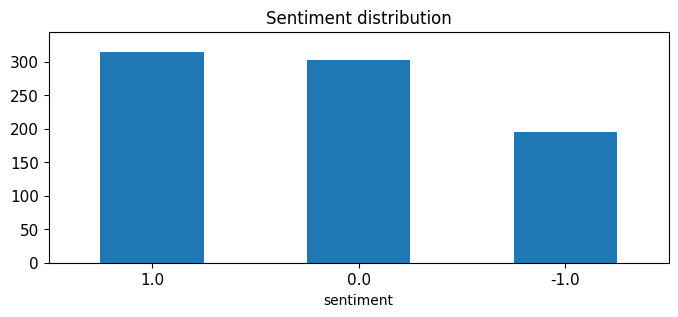

In [21]:
# Answer here
# distribution of sentiment of the original data
print(f'----------------------------\n{df.sentiment.value_counts()}\n----------------------------')

# plot barchart
df.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, max(df.sentiment.value_counts())+30],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

----------------------------
label
 0.0    391
-1.0    315
 1.0    107
Name: count, dtype: int64
----------------------------


<Axes: title={'center': 'Label distribution'}, xlabel='label'>

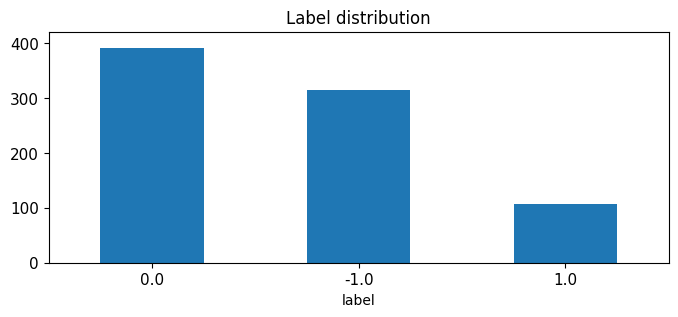

In [22]:
# distribution of label of the original data
print(f'----------------------------\n{df.label.value_counts()}\n----------------------------')

# plot barchart
df.label.value_counts().plot(kind = 'bar',
                                    title = 'Label distribution',
                                    ylim = [0, max(df.label.value_counts())+30],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

----------------------------
sentiment
 0.0    194
 1.0    192
-1.0    114
Name: count, dtype: int64
----------------------------


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

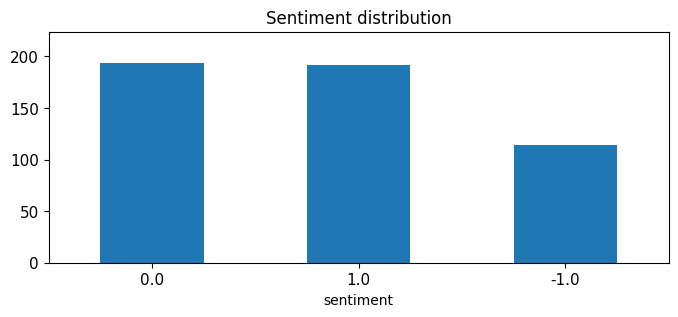

In [23]:
# distribution of sentiment of the sample data
print(f'----------------------------\n{df_sample.sentiment.value_counts()}\n----------------------------')

# plot barchart
df_sample.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, max(df_sample.sentiment.value_counts())+30],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

----------------------------
label
 0.0    245
-1.0    185
 1.0     70
Name: count, dtype: int64
----------------------------


<Axes: title={'center': 'Label distribution'}, xlabel='label'>

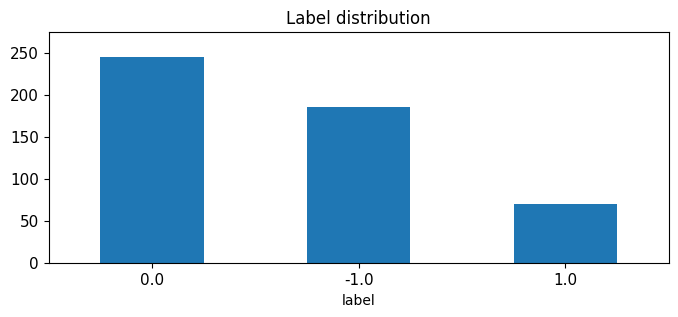

In [24]:
# distribution of label of the sample data
print(f'----------------------------\n{df_sample.label.value_counts()}\n----------------------------')

# plot barchart
df_sample.label.value_counts().plot(kind = 'bar',
                                    title = 'Label distribution',
                                    ylim = [0, max(df_sample.label.value_counts())+30],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

Text(0.5, 1.0, 'Sentiment distribution')

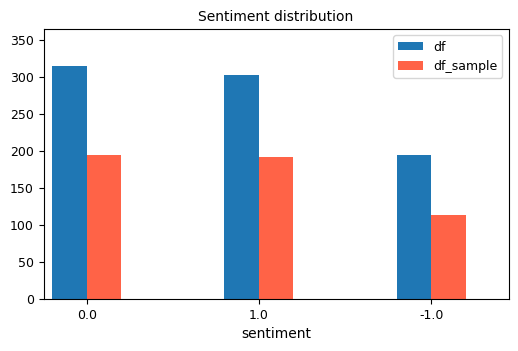

In [25]:
# Answer here
# sentiment
df.sentiment.value_counts().plot(kind = 'bar',
                                    ylim = [0, df.sentiment.value_counts().max()+50],        
                                    rot = 0, fontsize = 9, figsize = (6,3.5), 
                                    color = "tab:blue", position = 1, width = 0.2, label = "df")
df_sample.sentiment.value_counts().plot(kind = 'bar',
                                           ylim = [0, df.sentiment.value_counts().max()+50], 
                                           rot = 0, fontsize = 9, figsize = (6,3.5), 
                                           color = "tomato", position = 0, width = 0.2, label = "df_sample")
plt.legend(loc = "upper right", fontsize = 9)
plt.title("Sentiment distribution", fontsize=10)

Text(0.5, 1.0, 'Label distribution')

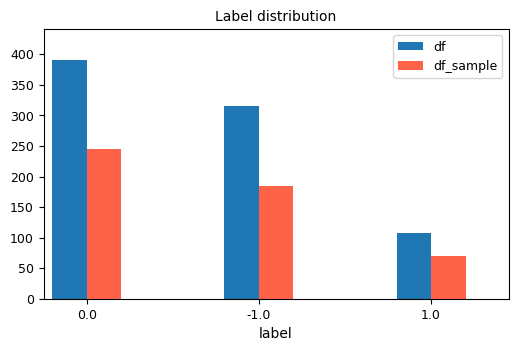

In [26]:
# label
df.label.value_counts().plot(kind = 'bar',
                                    ylim = [0, df.label.value_counts().max()+50],        
                                    rot = 0, fontsize = 9, figsize = (6,3.5), 
                                    color = "tab:blue", position = 1, width = 0.2, label = "df")
df_sample.label.value_counts().plot(kind = 'bar',
                                           ylim = [0, df.label.value_counts().max()+50], 
                                           rot = 0, fontsize = 9, figsize = (6,3.5), 
                                           color = "tomato", position = 0, width = 0.2, label = "df_sample")
plt.legend(loc = "upper right", fontsize = 9)
plt.title("Label distribution", fontsize=10)

---

### 5.2 Feature Creation

In [27]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/apple/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
# obtain unigram for each text
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

/var/folders/ny/_6v277v904l0twfxxsw8cqq00000gn/T/ipykernel_4927/1561424834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))


In [29]:
# take a look at the data
df[0:4]

,text,sentiment,label,unigrams
0,Calls on retards,-1.0,-1.0,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,1.0,0.0,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0.0,0.0,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,"[Vision, Marine, Technologies, Inc., is, rewri..."


### 5.3 Feature subset selection

In [30]:
# generate a document-term matrix from the original dataset df
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


### **>>> Exercise 9 (Watch Video):**
Let's analyze the first record of our df dataframe with the new analyzer we have just built. Go ahead try it!

In [31]:
# Answer here
analyze = count_vect.build_analyzer()
analyze(df.text[0])

['calls', 'on', 'retards']

---

In [32]:
# check the shape of this matrix
df_counts.shape

(813, 4313)

In [33]:
# We can obtain the feature names of the vectorizer, i.e., the terms
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [34]:
# convert from sparse array to normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

=> verify the word that represents by the `3` that first appears in the fourth record.

In [35]:
count_vect.get_feature_names_out()[df_counts[3][0:50].toarray().nonzero()[1][0]]

'116'

---

### heatmap

In [36]:
import seaborn as sns

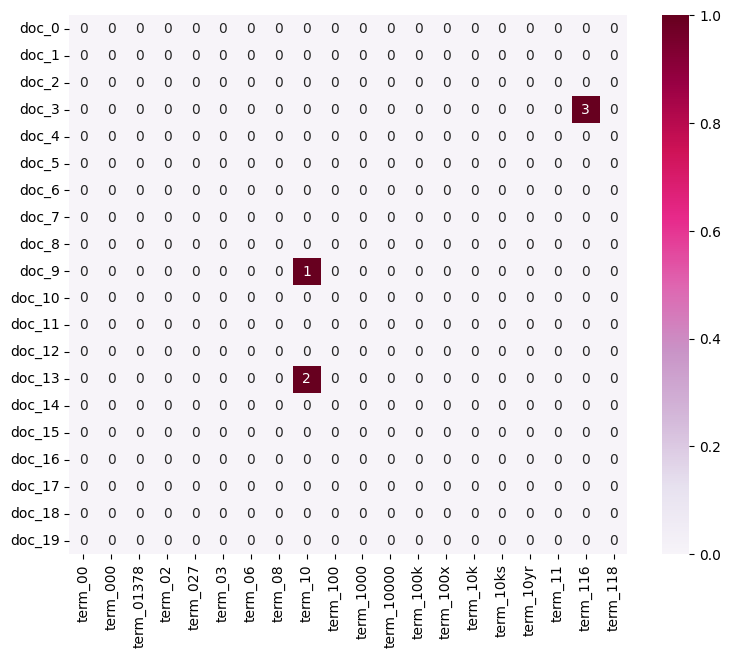

In [37]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_z = df_counts[0:20, 0:20].toarray() # df_counts[how many documents, how many terms]
plot_z
# plot
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

<Axes: ylabel='None'>

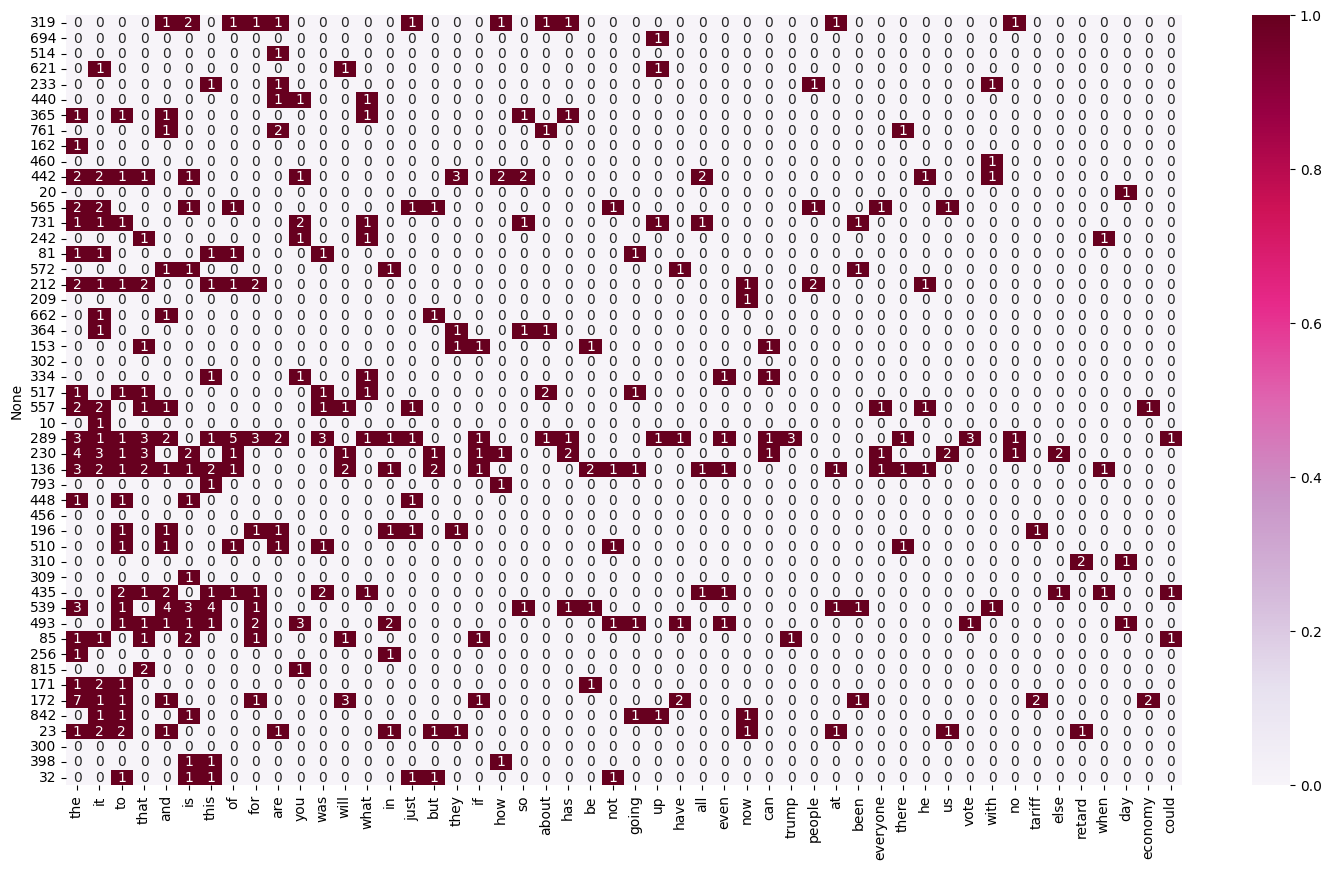

In [38]:
# Answer here
# I would sample 50 documents, and then choose the top 50 frequency terms to make a heatmap.
import numpy as np
# sample 50 documents
random_doc_indices = np.random.choice(df.shape[0], size=50, replace=False)
df_sample_counts = df_counts[random_doc_indices, :]
doc_labels = df.index[random_doc_indices] 
# get top 50 freq terms
term_freq = np.asarray(df_sample_counts.sum(axis=0)).flatten()
top_indices = np.argsort(term_freq)[::-1][:50]
df_final_subset = df_sample_counts[:, top_indices]
# visualization
feature_names = count_vect.get_feature_names_out()[top_indices]
df_todraw_final = pd.DataFrame(
    df_final_subset.toarray(), 
    columns=feature_names, 
    index=[doc_labels] # Use the actual index labels
)
plt.subplots(figsize=(18, 10))
sns.heatmap(df_todraw_final, cmap="PuRd", vmin=0, vmax=1, annot=True)

---

### 5.4 Attribute Transformation / Aggregation

###  5.4.1 Transform Text Data

In [39]:
# compute these frequencies for each term in all documents
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [40]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [41]:
#sum of the first term
term_frequencies[0] 

np.int64(4)

/var/folders/ny/_6v277v904l0twfxxsw8cqq00000gn/T/ipykernel_4927/2967701368.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


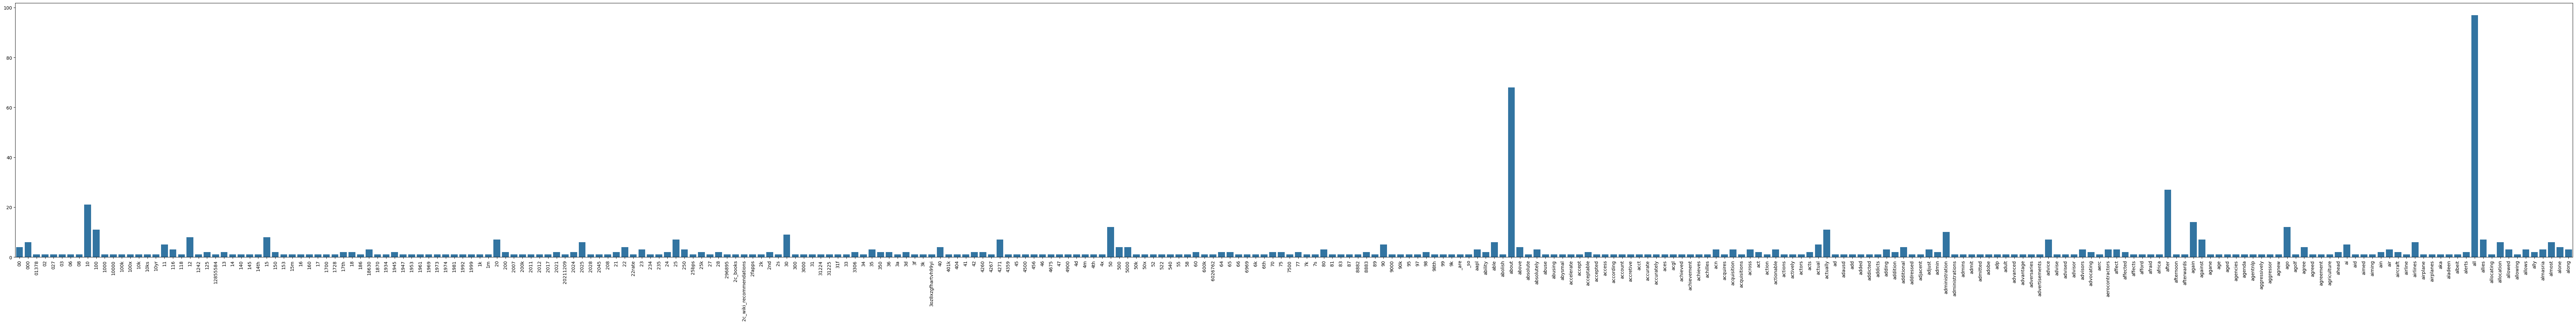

In [42]:
# plot the distribution of the first 300 terms
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

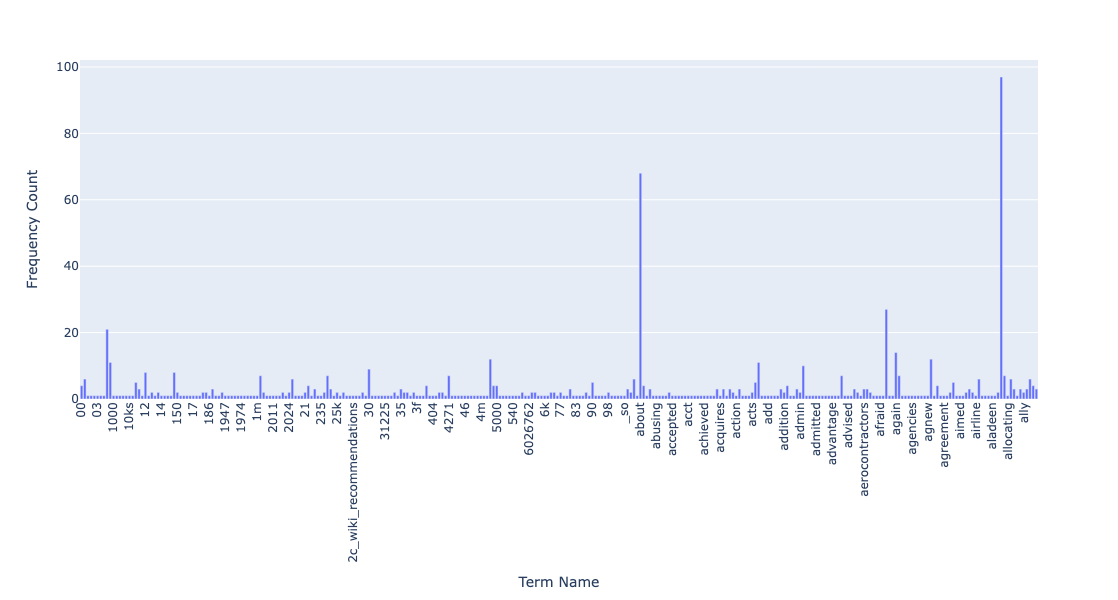

In [43]:
# Answer here
import plotly.express as px
df_freq_300term = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[:300],
    "freq": np.asarray(term_frequencies)[:300]
})
fig_300 = px.bar(df_freq_300term, x='term', y='freq', height=600)
fig_300.update_layout(xaxis_tickangle=-90, xaxis_title_text='Term Name', yaxis_title_text='Frequency Count')

---

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

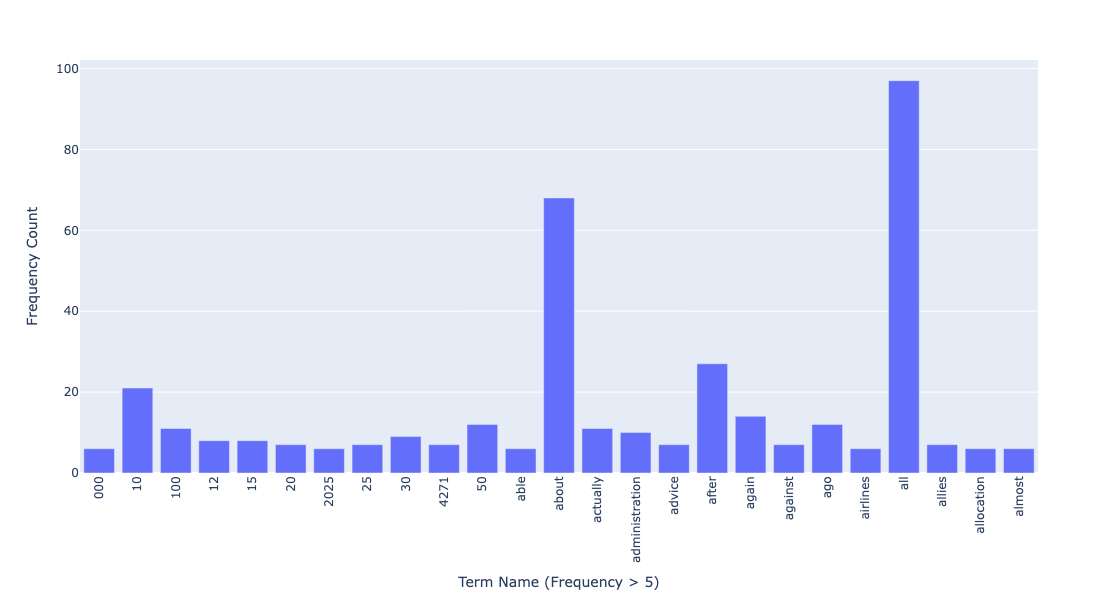

In [44]:
# Answer here
# I would like to remove the terms that have only 5 frequency or below of the first 300 vocabularies in the documents.
filtered_indices = np.where(np.array(term_frequencies[:300]) > 5)
df_freq_300_adj = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[filtered_indices],
    "freq": np.asarray(term_frequencies)[filtered_indices]
})
fig_300_adj = px.bar(df_freq_300_adj, x='term', y='freq', height=600)
fig_300_adj.update_layout(xaxis_tickangle=-90, xaxis_title_text='Term Name (Frequency > 5)', yaxis_title_text='Frequency Count')

---

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [45]:
# Answer here
df_freq_300term = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[:300],
    "freq": np.asarray(term_frequencies)[:300]
})
df_sorted = df_freq_300term.sort_values(by='freq', ascending=False).reset_index(drop=True)
fig_300_sorted = px.bar(df_sorted, x='term', y='freq', height=600)
fig_300_sorted.update_layout(xaxis_tickangle=-90, xaxis_title_text='Term Name (Sorted by frequency)', yaxis_title_text='Frequency Count')

---

### log distribution

In [46]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/ny/_6v277v904l0twfxxsw8cqq00000gn/T/ipykernel_4927/2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



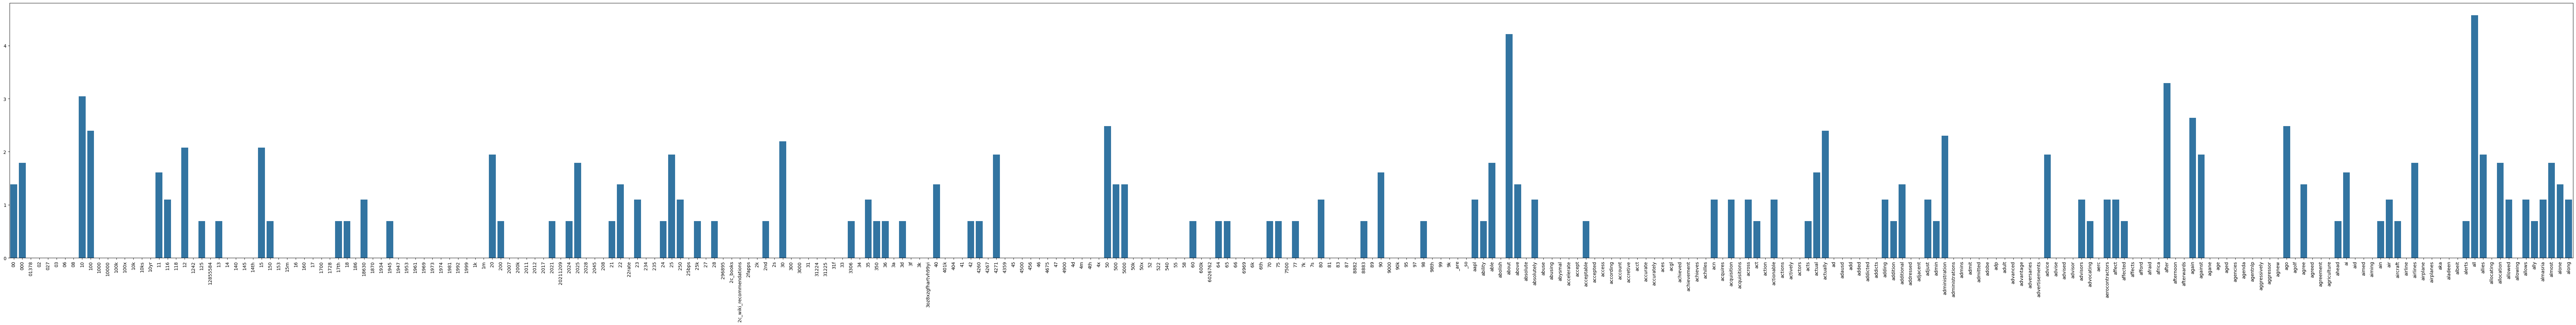

In [47]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

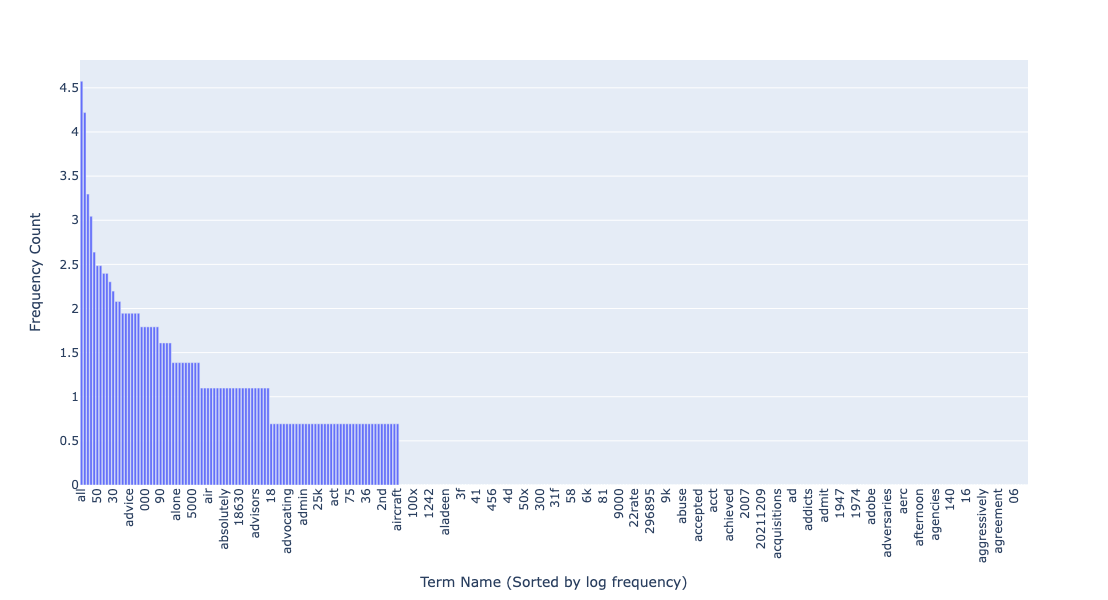

In [48]:
# Answer here
df_freq_log = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[:300],
    "freq": np.asarray(term_frequencies_log)[:300]
})
df_log_sorted = df_freq_log.sort_values(by='freq', ascending=False).reset_index(drop=True)
fig_log_sorted = px.bar(df_log_sorted, x='term', y='freq', height=600)
fig_log_sorted.update_layout(xaxis_tickangle=-90, xaxis_title_text='Term Name (Sorted by log frequency)', yaxis_title_text='Frequency Count')

---

# 3. Third

## new data visualizations (WordCloud)

In [49]:
#!pip install wordcloud

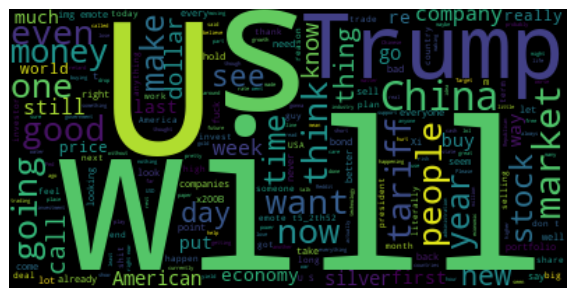

In [50]:
# use function in helpers.text_analysis
from wordcloud import WordCloud

def plot_word_cloud(text):
    word_cloud = WordCloud().generate(text)
    plt.figure(figsize=(8,6), dpi=90)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
# Combine all text into a single string
all_text = ' '.join(df['text'].fillna('').tolist())
all_text
plot_word_cloud(all_text)

# Phase 2

In [51]:
### Begin Assignment Here